In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("D:/Code/datasets/house prices/train.csv", header=0, encoding='unicode_escape')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
# Function for initial parsing of df information

# Goals:
# For each col, find out the number of unique values, data type, number of NaN/null values
# create a dictionary output that contains all this information
df_data = {}

for column in list(df): # col name
    data_to_append = {}

    # Unique Values
    number_of_unique_values = df[f"{column}"].nunique()
    data_to_append["Unique Values"] = number_of_unique_values

    # Data Type
    data_type = df[f"{column}"].dtype
    data_to_append["Data Type"] = data_type
    #data type for some columns 


    # Count of Non Null rows per column
    filled_row_count = df[f"{column}"].notnull().sum()
    data_to_append["No. of Filled Rows"] = filled_row_count

    # Min Value - change this to isdigit/isalphnumeric etc to account for other numerical data types
    if data_type == "int64":
        min_value = df[f"{column}"].min()
        data_to_append["Min Value"] = min_value

    # Max Value
    if data_type == "int64":
        max_value = df[f"{column}"].max()
        data_to_append["Max Value"] = max_value

    df_data[f"{column}"] = data_to_append

print(df_data)
print(len(df_data))

output = {
    "numerical_cols": {
        "a": {
            "range": []
        }
    },
    "categorical_cols": {
        "b": {
            "number of unique": 3,

        }
    },
    "datetime_cols": {}
}

{'Id': {'Unique Values': 1460, 'Data Type': dtype('int64'), 'No. of Filled Rows': 1460, 'Min Value': 1, 'Max Value': 1460}, 'MSSubClass': {'Unique Values': 15, 'Data Type': dtype('int64'), 'No. of Filled Rows': 1460, 'Min Value': 20, 'Max Value': 190}, 'MSZoning': {'Unique Values': 5, 'Data Type': dtype('O'), 'No. of Filled Rows': 1460}, 'LotFrontage': {'Unique Values': 110, 'Data Type': dtype('float64'), 'No. of Filled Rows': 1201}, 'LotArea': {'Unique Values': 1073, 'Data Type': dtype('int64'), 'No. of Filled Rows': 1460, 'Min Value': 1300, 'Max Value': 215245}, 'Street': {'Unique Values': 2, 'Data Type': dtype('O'), 'No. of Filled Rows': 1460}, 'Alley': {'Unique Values': 2, 'Data Type': dtype('O'), 'No. of Filled Rows': 91}, 'LotShape': {'Unique Values': 4, 'Data Type': dtype('O'), 'No. of Filled Rows': 1460}, 'LandContour': {'Unique Values': 4, 'Data Type': dtype('O'), 'No. of Filled Rows': 1460}, 'Utilities': {'Unique Values': 2, 'Data Type': dtype('O'), 'No. of Filled Rows': 1460

In [11]:

def df_info(input_df):
    df_data = {}
    for column in list(df):
        data_to_append = {}
        # first sort through what type it is 
        ## Numerical data type workflow
        ## what if it's int32 or other variations? should i jsut convert this into a string then run .str.isnumeric operation on it?
        # using isinstance(x,int) would not work in pandas because pandas doesnt treat an int in the same way as in native python

        if df[f"{column}"].dtype == "int64" or df[f"{column}"].dtype == "float64":
            # then i should append a data type that shows that its a numerical 
            data_to_append["Data Type"] = "Numerical"
            # range
            max_value = df[f"{column}"].max()
            min_value = df[f"{column}"].min()
            data_to_append["Range"] = str(min_value) + "-" + str(max_value)

        elif df[f"{column}"].dtype == "str" or df[f"{column}"].dtype == "O":
            data_to_append["Data Type"] = "Categorical"
            number_of_unique_values = df[f"{column}"].nunique()
            data_to_append["Unique Values"] = number_of_unique_values

        #datetime type
        elif df[f"{column}"].dtype == "datetime64":
            data_to_append["Data Type"] = "Date Time"

        # from there => add more details for each column respectively
        df_data[f"{column}"] = data_to_append
    
    return df_data

print(df_info(df))

output1 = {
    "col a": {
        "data type": "numeric/categorical/datetime" 
        "if numeric - give range"
        "if categorical - give number of unique values (i.e categories) " 

    }

}

{'Id': {'Data Type': 'Numerical', 'Range': '1-1460'}, 'MSSubClass': {'Data Type': 'Numerical', 'Range': '20-190'}, 'MSZoning': {'Data Type': 'Categorical', 'Unique Values': 5}, 'LotFrontage': {'Data Type': 'Numerical', 'Range': '21.0-313.0'}, 'LotArea': {'Data Type': 'Numerical', 'Range': '1300-215245'}, 'Street': {'Data Type': 'Categorical', 'Unique Values': 2}, 'Alley': {'Data Type': 'Categorical', 'Unique Values': 2}, 'LotShape': {'Data Type': 'Categorical', 'Unique Values': 4}, 'LandContour': {'Data Type': 'Categorical', 'Unique Values': 4}, 'Utilities': {'Data Type': 'Categorical', 'Unique Values': 2}, 'LotConfig': {'Data Type': 'Categorical', 'Unique Values': 5}, 'LandSlope': {'Data Type': 'Categorical', 'Unique Values': 3}, 'Neighborhood': {'Data Type': 'Categorical', 'Unique Values': 25}, 'Condition1': {'Data Type': 'Categorical', 'Unique Values': 9}, 'Condition2': {'Data Type': 'Categorical', 'Unique Values': 8}, 'BldgType': {'Data Type': 'Categorical', 'Unique Values': 5}, 'H

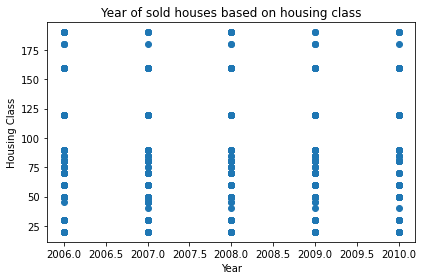

In [5]:
## Storing impt columns as variables
year_sold = df["YrSold"]
house_class = df["MSSubClass"]

# Scatter plot
plt.scatter(year_sold, house_class)
plt.title("Year of sold houses based on housing class")
plt.xlabel("Year")
plt.ylabel("Housing Class")
plt.tight_layout()
plt.show()

In [19]:
## Units sold by Housing Class
temp_df = df.copy(deep=True)
temp_df = temp_df[["MSSubClass", "YrSold"]]
temp_df["Unit Sold Boolean"] = np.where(temp_df["YrSold"].isnull() == 0, 1, 0)

housing_class_df = temp_df[["MSSubClass", "Unit Sold Boolean"]]
housing_class_df["Total"] = housing_class_df.groupby(["MSSubClass"])["Unit Sold Boolean"].transform("sum")
housing_class_df = housing_class_df[["MSSubClass", "Total"]].drop_duplicates(subset=["MSSubClass"])
housing_class_df.sort_values(by=["MSSubClass"], ascending=True, inplace=True)

def plotting_function(visual, x_label, y_label, title_of_visual):
    visual_to_show = visual
    plt.plot(housing_class_df["MSSubClass"], housing_class_df["Total"])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title_of_visual)
    plt.tight_layout()
    plt.show()

plotting_function("plot", "Housing Class", "Units Sold", "Total Number of Units sold by Housing Class from 2006-2010")

# Line Chart
plt.plot(housing_class_df["MSSubClass"], housing_class_df["Total"])
plt.xlabel("Housing Class")
plt.ylabel("Units Sold")
plt.title("Total Number of Units sold by Housing Class from 2006-2010")
plt.tight_layout()
plt.show()

# Histogram
plt.bar(housing_class_df["MSSubClass"], housing_class_df["Total"], width=5)
plt.xlabel("Housing Class")
plt.ylabel("Units Sold")
plt.title("Total Number of Units sold by Housing Class from 2006-2010")
plt.tight_layout()
plt.show()

## Create a dynamic function that can be run to plot any kind of visualisation based on arugments
## Give reasoning for each visualisation based on the value type that youre displaying

SyntaxError: invalid syntax (3281183669.py, line 13)

In [7]:
# Units sold by Year

